In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [76]:
fake = pd.read_csv("/home/Fake.csv")
true = pd.read_csv("/home/True.csv")

In [77]:
fake.shape
#true.shape

(3972, 4)

In [78]:
fake['target'] = 'fake'
true['target'] = 'true'

In [79]:
fake.head()
true.head()

,title,text,subject,date,target
0,U.S. veterans to Trump: Save bank customers' r...,WASHINGTON (Reuters) - The largest U.S. vetera...,politicsNews,"October 26, 2017",true
1,House narrowly passes measure paving way for T...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"October 26, 2017",true
2,U.S. appoints new top official at Havana embas...,HAVANA (Reuters) - The United States said on T...,politicsNews,"October 26, 2017",true
3,Fatal Niger operation sparks calls for public ...,WASHINGTON (Reuters) - Democratic U.S. lawmake...,politicsNews,"October 26, 2017",true
4,Trump administration taps coal consultant for ...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"October 26, 2017",true


In [80]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(7943, 5)

In [81]:
data.head(5)
data.tail(5)

,title,text,subject,date,target
7938,Irma strengthens to a Category 5 hurricane: NHC,(Reuters) - Irma on Tuesday intensified into a...,worldnews,"September 5, 2017",true
7939,Britain's Labour says cannot vote for EU withd...,LONDON (Reuters) - Britain s main opposition L...,worldnews,"September 5, 2017",true
7940,Malaysia summons Myanmar ambassador over viole...,KUALA LUMPUR (Reuters) - Malaysia on Tuesday s...,worldnews,"September 5, 2017",true
7941,Merkel wants EU to consider halting Turkish ac...,BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,"September 5, 2017",true
7942,China seeks to silence critics at U.N. forums:...,GENEVA (Reuters) - Beijing is waging a campaig...,worldnews,"September 5, 2017",true


In [82]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [83]:
data.head()

,title,text,subject,date,target
0,Even The Secret Service Is Saying Trump Is Fu...,Donald Trump is acting like a caged animal. Si...,News,"June 12, 2017",fake
1,Americans Gloriously Mock Trump After He Brag...,Nothing is wrong. Pay no attention to the fire...,News,"July 12, 2017",fake
2,Zimbabwe's Tsvangirai 'out of danger' in South...,JOHANNESBURG (Reuters) - Zimbabwe opposition l...,worldnews,"September 19, 2017",true
3,Senate Republican leader starts clock ticking ...,WASHINGTON (Reuters) - The U.S. Senate moved o...,politicsNews,"April 4, 2017",true
4,Episode #203 – SUNDAY WIRE: ‘The Dotard Effect...,Episode #203 of SUNDAY WIRE SHOW resumes on S...,Middle-east,"September 24, 2017",fake


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7943 entries, 0 to 7942
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    7943 non-null   object
 1   text     7943 non-null   object
 2   subject  7943 non-null   object
 3   date     7943 non-null   object
 4   target   7943 non-null   object
dtypes: object(5)
memory usage: 310.4+ KB


In [85]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Even The Secret Service Is Saying Trump Is Fu...,Donald Trump is acting like a caged animal. Si...,News,fake
1,Americans Gloriously Mock Trump After He Brag...,Nothing is wrong. Pay no attention to the fire...,News,fake
2,Zimbabwe's Tsvangirai 'out of danger' in South...,JOHANNESBURG (Reuters) - Zimbabwe opposition l...,worldnews,true
3,Senate Republican leader starts clock ticking ...,WASHINGTON (Reuters) - The U.S. Senate moved o...,politicsNews,true
4,Episode #203 – SUNDAY WIRE: ‘The Dotard Effect...,Episode #203 of SUNDAY WIRE SHOW resumes on S...,Middle-east,fake


In [86]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Donald Trump is acting like a caged animal. Si...,News,fake
1,Nothing is wrong. Pay no attention to the fire...,News,fake
2,JOHANNESBURG (Reuters) - Zimbabwe opposition l...,worldnews,true
3,WASHINGTON (Reuters) - The U.S. Senate moved o...,politicsNews,true
4,Episode #203 of SUNDAY WIRE SHOW resumes on S...,Middle-east,fake


In [87]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,donald trump is acting like a caged animal. si...,News,fake
1,nothing is wrong. pay no attention to the fire...,News,fake
2,johannesburg (reuters) - zimbabwe opposition l...,worldnews,true
3,washington (reuters) - the u.s. senate moved o...,politicsNews,true
4,episode #203 of sunday wire show resumes on s...,Middle-east,fake


In [88]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [89]:
data.head()

,text,subject,target
0,donald trump is acting like a caged animal sin...,News,fake
1,nothing is wrong pay no attention to the fire ...,News,fake
2,johannesburg reuters zimbabwe opposition lead...,worldnews,true
3,washington reuters the us senate moved on tue...,politicsNews,true
4,episode 203 of sunday wire show resumes on se...,Middle-east,fake


In [90]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
data.head()

,text,subject,target
0,donald trump acting like caged animal since ar...,News,fake
1,nothing wrong pay attention fire raging around...,News,fake
2,johannesburg reuters zimbabwe opposition leade...,worldnews,true
3,washington reuters us senate moved tuesday tow...,politicsNews,true
4,episode 203 sunday wire show resumes sept 24th...,Middle-east,fake


subject
Government News     101
Middle-east         243
News               1652
US_News             274
left-news           472
politics           1230
politicsNews       2421
worldnews          1550
Name: text, dtype: int64


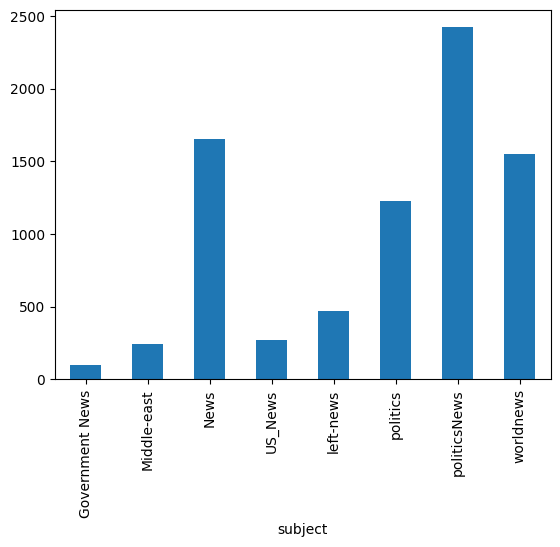

In [92]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    3972
true    3971
Name: text, dtype: int64


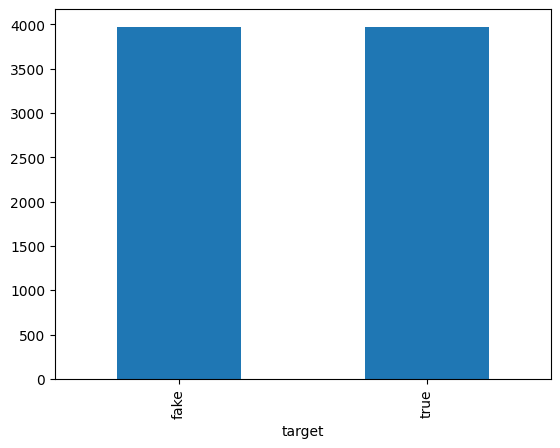

In [93]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

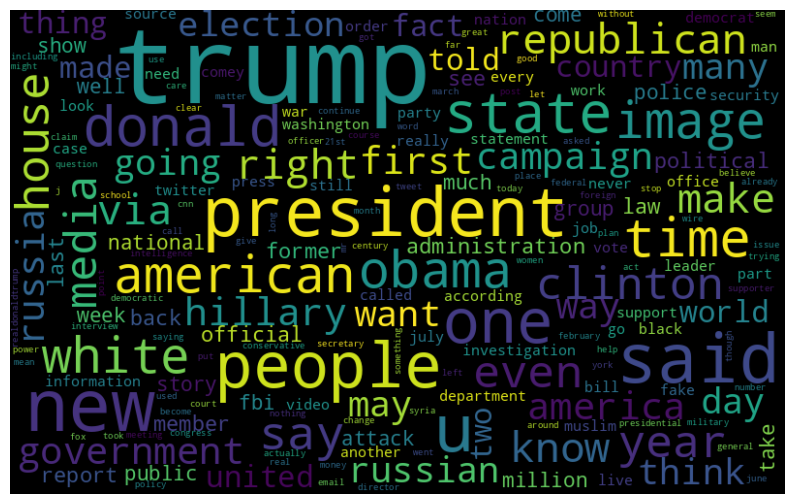

In [94]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

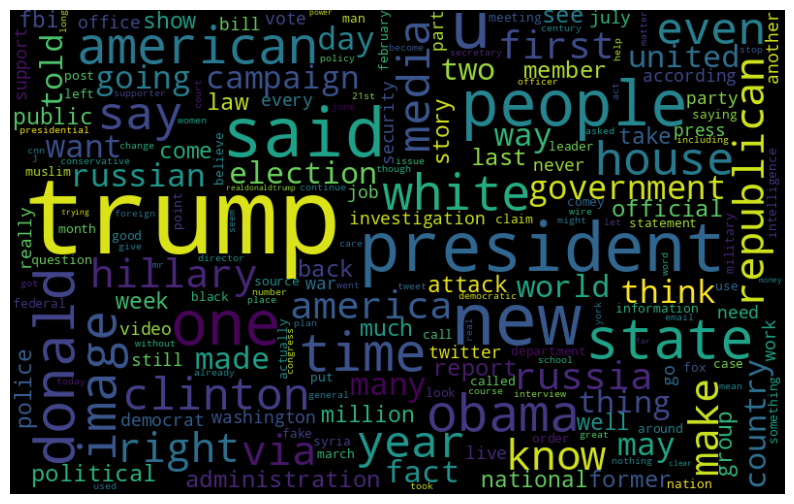

In [95]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

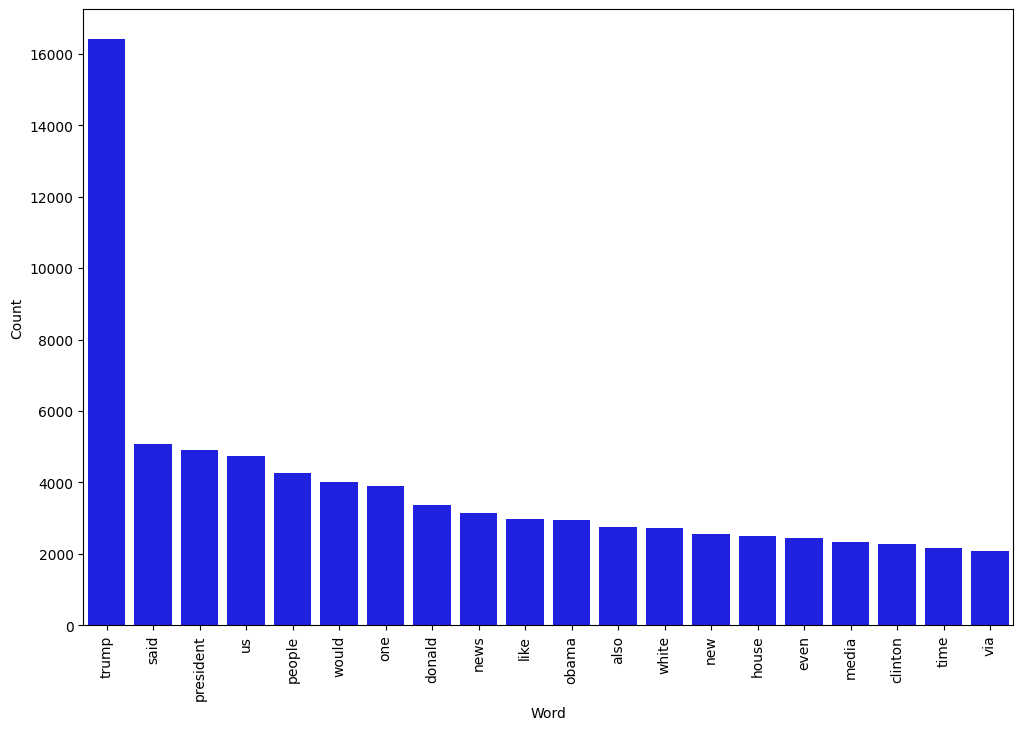

In [97]:
counter(data[data["target"] == "fake"], "text", 20)

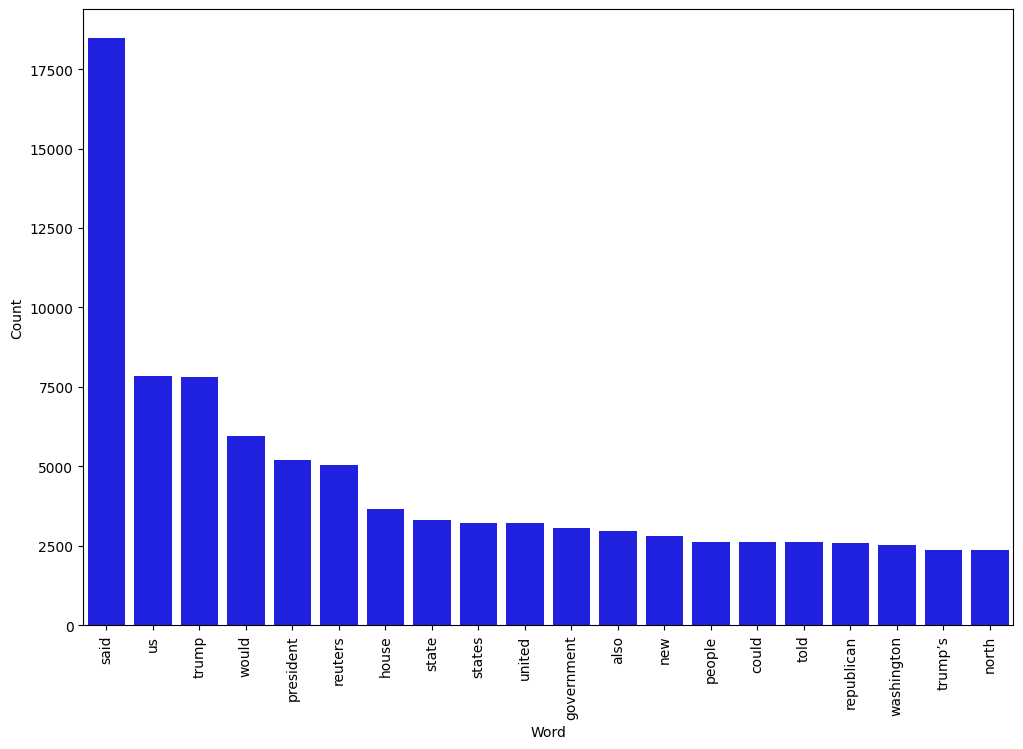

In [98]:
counter(data[data["target"] == "true"], "text", 20)

In [99]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2)

In [106]:
X_train.head()

482     london reuters british prime minister theresa ...
1998    watched trumps acceptance speech last night mi...
3750    reuters florida insurance reinsurance market w...
7457    love one greatest pro golfers ever trump train...
5749    julian assange became computer hacker teen yea...
Name: text, dtype: object

In [107]:
y_train.head()

482     true
1998    fake
3750    true
7457    fake
5749    fake
Name: target, dtype: object

In [108]:

vect=TfidfVectorizer()
X_train=vect.fit_transform(X_train)
X_test=vect.transform(X_test)
model=LogisticRegression()
# Vectorizing and applying TF-IDF

# Fitting the model
model.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.86%


Confusion matrix, without normalization


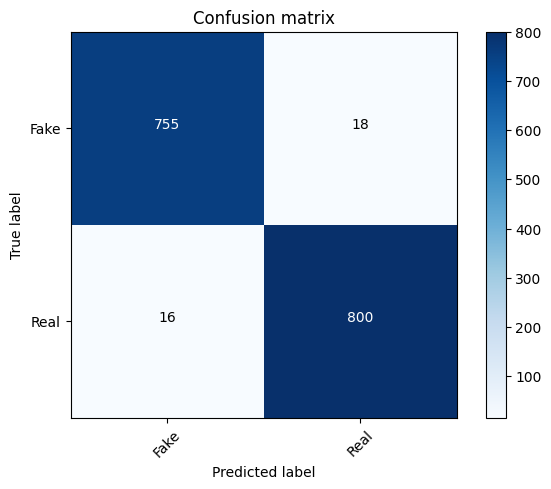

In [109]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [111]:
pickle.dump(vect, open('/home/vector.pkl', 'wb'))

In [112]:
pickle.dump(model, open('/home/model.pkl', 'wb'))

In [113]:
vector_form=pickle.load(open('/home/vector.pkl', 'rb'))

In [114]:
load_model=pickle.load(open('/home/model.pkl', 'rb'))

In [115]:
port_stem=PorterStemmer()

In [116]:
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con

In [117]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [123]:
val=fake_news(""" WASHINGTON (Reuters) - The U.S. House of Representatives voted nearly unanimously on Thursday for new sanctions on Iranâ€™s ballistic missile program, part of an effort to clamp down on Tehran without immediately moving to undermine an international nuclear agreement. The vote was 423 to two for the â€œIran Ballistic Missiles and International Sanctions Enforcement Act.â€ Among other things, it calls on the U.S. president to report to Congress on the Iranian and international supply chain for Iranâ€™s ballistic missile program and to impose sanctions on Iranian government or foreign entities that support it. President Donald Trump said on Oct. 13 he would not certify Iran is complying with an international agreement on its nuclear program, and threatened that he might ultimately terminate the accord. Trumpâ€™s action opened a 60-day window for Congress to act to reimpose sanctions on Iranâ€™s nuclear program that were lifted under the agreement, but there has been no move to do so in the House or Senate. Aides said that, for now, House lawmakers are focusing on clamping down on Iran in other ways such as the Hezbollah and missile-related sanctions. U.S. Representative Ed Royce, the Republican chairman of the House Foreign Affairs Committee, who sponsored the ballistic missile bill, has said the international nuclear deal should be strictly enforced by Washington working with its allies. â€œThe United States must respond to the full range of threats and, with this bill.... that is what we are doing today,â€ he said. The House passed three other Iran-related measures on Wednesday, including new sanctions on Lebanonâ€™s Iran-backed Hezbollah militia and a resolution urging the European Union to designate Hezbollah as a terrorist organization. [L2N1N02UY] To become law, the measure would have to pass the U.S. Senate and be signed into law by Trump.  """)

print(val)

['true']


In [ ]:
if (val==['fake']):
    print("This news is Fake")
else:
    print("This news is  Real")

This news is  Real
